# Dimensionality Reduction: Visualizing MDS and Hierarchical Clustering Outputs

This notebook helps visualize the outputs of MDS and hierarchical clustering.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS

subject = 'sub-01'  # Example subject

base_dir = '/home/hmueller2/ibc_code'

## Load RSM Data

RSM shape: (50, 50)
RDM shape: (50, 50)


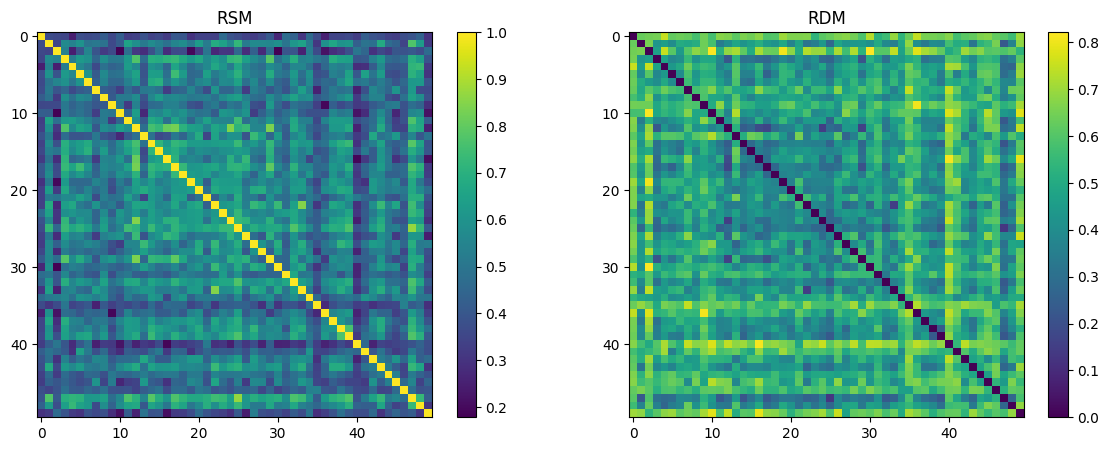

In [ ]:
def load_rsm(file_path):
    return np.load(file_path)

def load_rdm(file_path):
    return np.load(file_path)

rsm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rsm')
rdm_dir = os.path.join(base_dir, 'ibc_output_RA', 'raw', 'topographic_alignment', 'rdm')

rsm_file = os.path.join(rsm_dir, f'topographic_alignment_{subject}.npy')
rdm_file = os.path.join(rdm_dir, f'topographic_alignment_rdm_{subject}.npy')

rsm = load_rsm(rsm_file)
rdm = load_rdm(rdm_file)

print("RSM shape:", rsm.shape)
print("RDM shape:", rdm.shape)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.imshow(rsm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RSM')

plt.subplot(1, 2, 2)
plt.imshow(rdm, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('RDM')

plt.show()

## MDS Visualization

Comparing Clustering Techniques - Hierarchical vs KMeans:

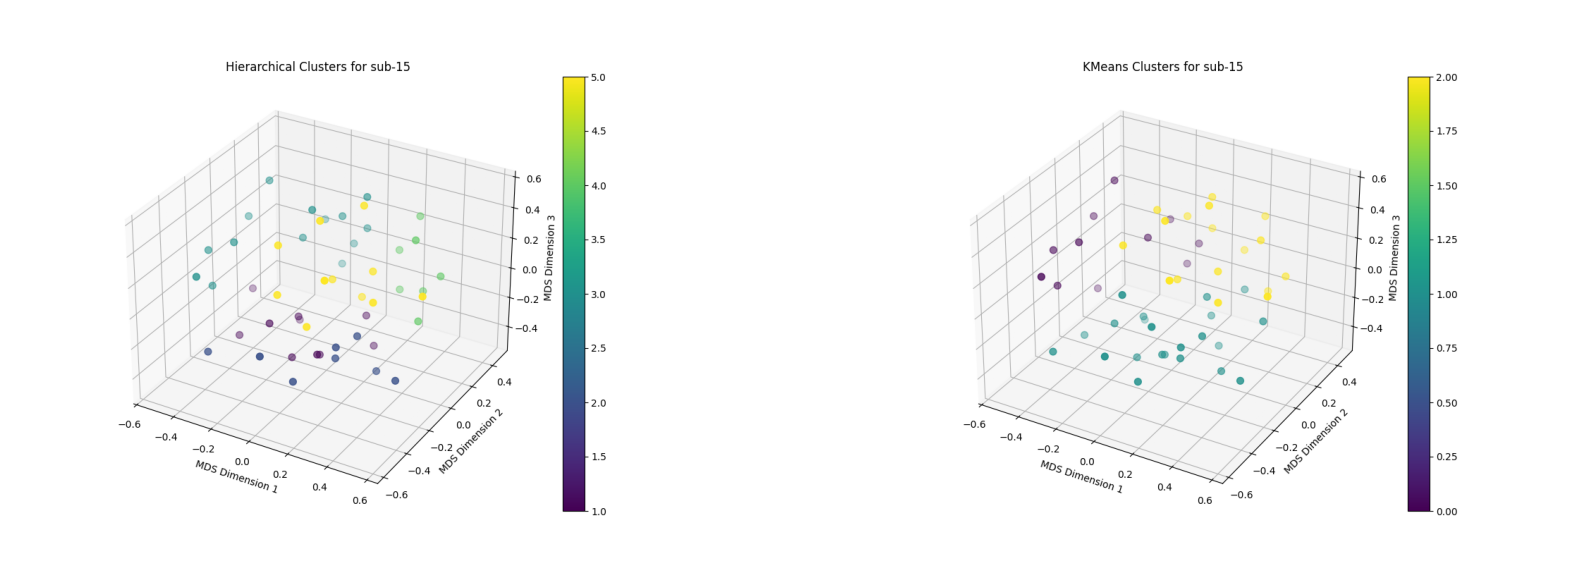

In [20]:
subject = 'sub-15'  # Specify the subject

# Define the directory and file paths
mds_dir = '/home/hmueller2/ibc_code/ibc_output_MDS/run_05'
hierarchical_file = os.path.join(mds_dir, f'clusters_Hierarchical Clusters for {subject}_{subject}_3d.png')
kmeans_file = os.path.join(mds_dir, f'clusters_KMeans Clusters for {subject}_{subject}_3d.png')

# Load and display the images
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

hierarchical_img = plt.imread(hierarchical_file)
axes[0].imshow(hierarchical_img)
axes[0].axis('off')

kmeans_img = plt.imread(kmeans_file)
axes[1].imshow(kmeans_img)
axes[1].axis('off')

plt.show()

# Visualize Task representations between clusters

### 2 Clusters:

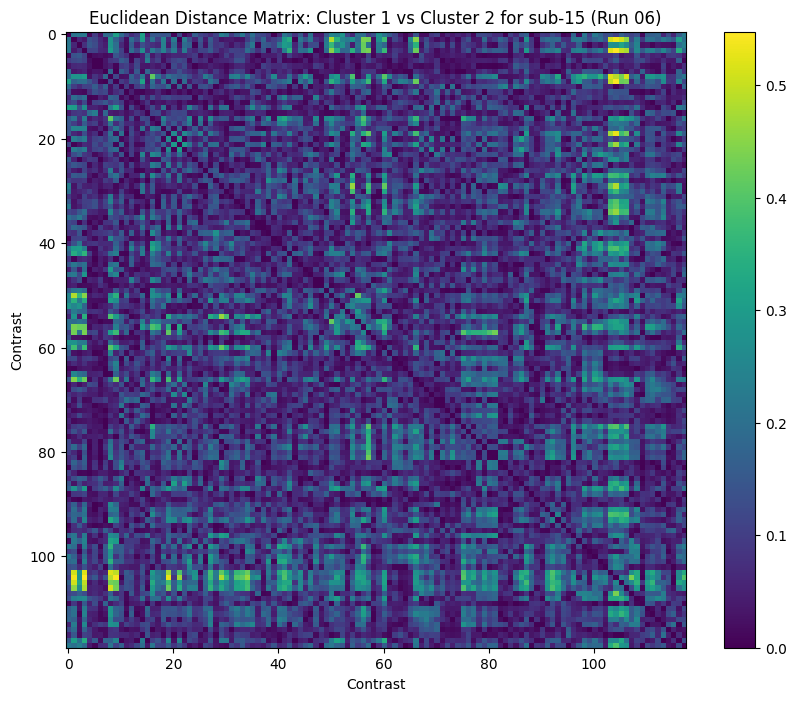

In [13]:
subject = 'sub-15'  # Specify the subject
run = '06'  # Specify the run
cluster1 = 1
cluster2 = 2

# Load the Euclidean Distance data (Average_RSM_Cluster_1 - Average_RSM_Cluster_2)
distance_file = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster2}_{subject}.csv')
distance_data = np.loadtxt(distance_file, delimiter=',', skiprows=1)

plt.figure(figsize=(10, 8))
plt.imshow(distance_data, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster1} vs Cluster {cluster2} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')
plt.show()

### 3 Clusters:

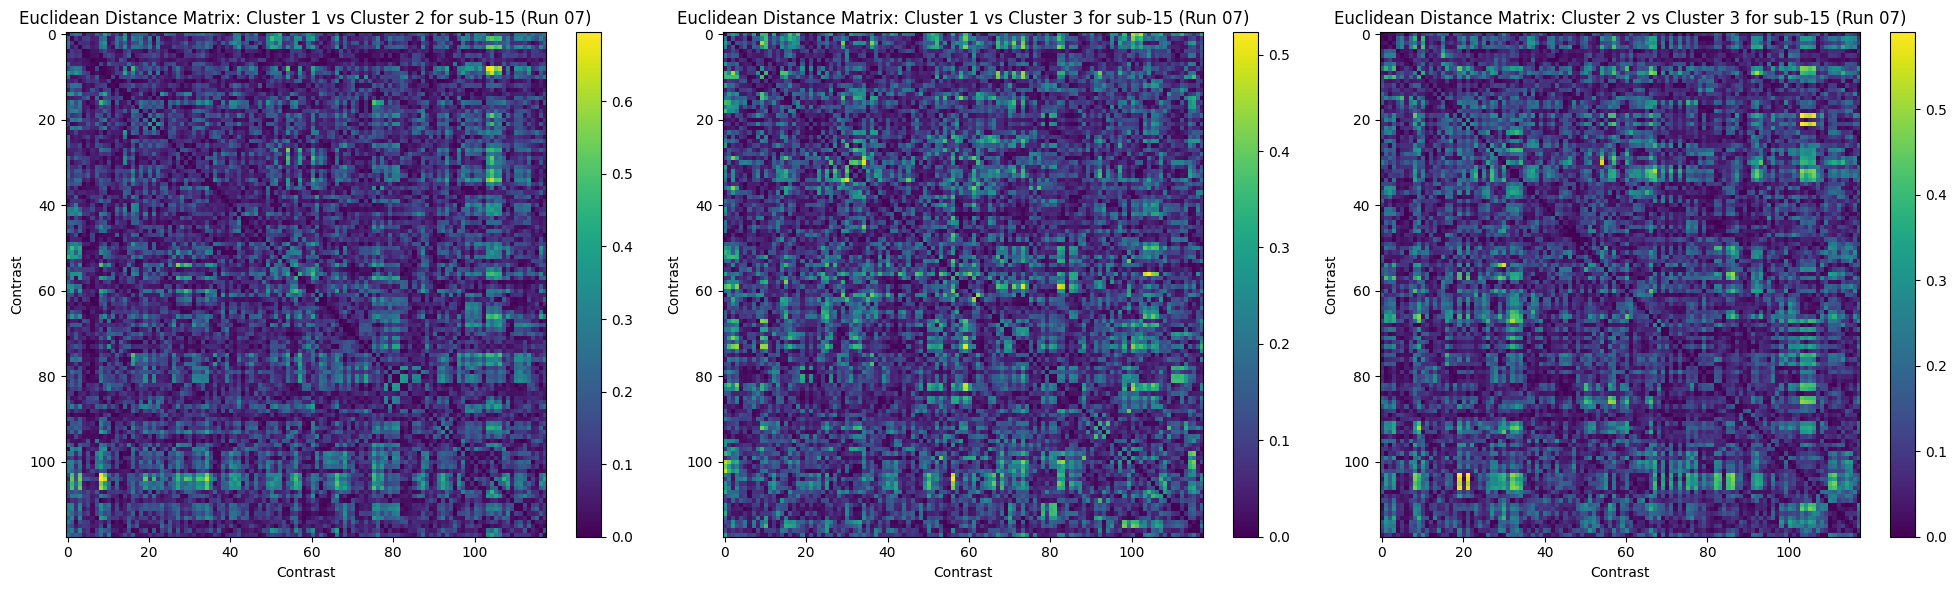

In [12]:
subject = 'sub-15'  # Specify the subject
run = '07'  # Specify the run
cluster1 = 1
cluster2 = 2
cluster3 = 3

# Load the Euclidean Distance data for Cluster 1-2, 1-3, and 2-3
distance_file_1_2 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster2}_{subject}.csv')
distance_file_1_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster1}-{cluster3}_{subject}.csv')
distance_file_2_3 = os.path.join(base_dir, 'ibc_output_KMeans_onMDS', f'run_{run}', f'{cluster2}-{cluster3}_{subject}.csv')

distance_data_1_2 = np.loadtxt(distance_file_1_2, delimiter=',', skiprows=1)
distance_data_1_3 = np.loadtxt(distance_file_1_3, delimiter=',', skiprows=1)
distance_data_2_3 = np.loadtxt(distance_file_2_3, delimiter=',', skiprows=1)

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.imshow(distance_data_1_2, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster1} vs Cluster {cluster2} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.subplot(1, 3, 2)
plt.imshow(distance_data_1_3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster1} vs Cluster {cluster3} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.subplot(1, 3, 3)
plt.imshow(distance_data_2_3, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title(f'Euclidean Distance Matrix: Cluster {cluster2} vs Cluster {cluster3} for {subject} (Run {run})')
plt.xlabel('Contrast')
plt.ylabel('Contrast')

plt.tight_layout()
plt.show()